# Bird Migration Route Visualization Tutorial

## Overview
This notebook demonstrates how to create professional migration route maps with:
- Connected migration routes (lines between points)
- Country borders drawn as polygons
- Country name labels for visited regions
- Color-coded trajectories by year
- Proper geographic projections

## Use Cases
- Analyzing nocturnal migrant patterns for light pollution studies
- Visualizing conservation corridors
- Understanding species-specific migration behaviors
- Creating publication-ready maps

## Dataset
The data should contain:
- `Bird genera`: Genus name
- `GPS_xx`: Longitude
- `GPS_yy`: Latitude  
- `Migration start year`: Year of observation
- `Migratory route codes`: Groups points into routes
- `Countries`: Country names
- `English Name`: Species common name

---
## Step 1: Import Required Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


---
## Step 2: Load and Explore the Dataset

In [9]:
# Load the bird migration dataset
# Replace with your file path
df = pd.read_excel('/Users/dazedinthecity/Documents/GitHub/ceu-ds-project-groupB-2026/historic_bird/vireo-plot-tut-1102.xlsx')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head()

Dataset shape: (171, 25)

Column names:
['ID', 'Migratory route codes', 'Migration nodes', 'Bird orders', 'Bird families', 'Bird genera', 'English Name', 'Bird species', 'Species Authority', 'Migration type', 'The IUCN Red List (2023)', 'Migration start year', 'Migration start month', 'Migration end year', 'Migration end month', 'Continents (1 = North America, 2 = South America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania)', 'Countries', 'Provinces', 'GPS_xx', 'GPS_yy', 'Migration patterns (1 = Intercontinental migration, 2 = Intracontinental migration)', 'Migration routes (1 = North America↔North America, 2 = South America↔South America, 3 = Europe↔Europe, 4 = Africa↔Africa, 5 = Asia↔Asia, 6 = Oceania↔Oceania, 7 = Europe→Africa, 8 = Africa→Europe, 9 = North America→South America, 10 = South America→North America, 11 = Europe→Asia, 12 = Asia→Europe, 13 = Asia→Africa, 14 = Africa→Asia, 15 = Europe→North America, 16 = North America→Europe, 17 = Asia→Oceania, 18 = Oceania→Asia, 19 = Nor

,ID,Migratory route codes,Migration nodes,Bird orders,Bird families,Bird genera,English Name,Bird species,Species Authority,Migration type,...,"Continents (1 = North America, 2 = South America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania)",Countries,Provinces,GPS_xx,GPS_yy,"Migration patterns (1 = Intercontinental migration, 2 = Intracontinental migration)","Migration routes (1 = North America↔North America, 2 = South America↔South America, 3 = Europe↔Europe, 4 = Africa↔Africa, 5 = Asia↔Asia, 6 = Oceania↔Oceania, 7 = Europe→Africa, 8 = Africa→Europe, 9 = North America→South America, 10 = South America→North America, 11 = Europe→Asia, 12 = Asia→Europe, 13 = Asia→Africa, 14 = Africa→Asia, 15 = Europe→North America, 16 = North America→Europe, 17 = Asia→Oceania, 18 = Oceania→Asia, 19 = North America→Oceania, 20 = Oceania→North America, 21 = North America→Asia)",References,Publish time,DOI
0,8837,377,Origin,Passeriformes,Vireonidae,Vireo,Vireo olivaceus,Vireo olivaceus,"Linnaeus, 1766",Full migrant,...,2,Brazil,Amazonas,-64.714881,-4.186777,1,10,Prolonged spring migration in the Red-eyed Vir...,2013,DOI:10.1525/auk.2013.12213
1,8838,377,Transit locations,Passeriformes,Vireonidae,Vireo,Vireo olivaceus,Vireo olivaceus,"Linnaeus, 1766",Full migrant,...,2,Colombia,Guainía,-68.823991,2.709874,1,10,Prolonged spring migration in the Red-eyed Vir...,2013,DOI:10.1525/auk.2013.12213
2,8839,377,Transit locations,Passeriformes,Vireonidae,Vireo,Vireo olivaceus,Vireo olivaceus,"Linnaeus, 1766",Full migrant,...,2,Colombia,Vichada,-69.415202,4.680443,1,10,Prolonged spring migration in the Red-eyed Vir...,2013,DOI:10.1525/auk.2013.12213
3,8840,377,Transit locations,Passeriformes,Vireonidae,Vireo,Vireo olivaceus,Vireo olivaceus,"Linnaeus, 1766",Full migrant,...,2,Colombia,Meta,-72.966148,3.318787,1,10,Prolonged spring migration in the Red-eyed Vir...,2013,DOI:10.1525/auk.2013.12213
4,8841,377,Transit locations,Passeriformes,Vireonidae,Vireo,Vireo olivaceus,Vireo olivaceus,"Linnaeus, 1766",Full migrant,...,2,Colombia,Cundinamarca,-74.125722,4.764670,1,10,Prolonged spring migration in the Red-eyed Vir...,2013,DOI:10.1525/auk.2013.12213


In [10]:
# Check available genera in the dataset
print("Available bird genera (first 20):")
print(df['Bird genera'].unique()[:20])
print(f"\nTotal unique genera: {df['Bird genera'].nunique()}")

Available bird genera (first 20):
['Vireo']

Total unique genera: 1


---
## Step 3: Define Country Borders

We create a dictionary of country polygons with simplified coordinates. Each country has:
- `coords`: List of (longitude, latitude) points defining the border
- `label_pos`: Center point for the country name label

**Note**: These are simplified borders for visualization. For precise maps, use libraries like `geopandas` with natural earth data.

In [11]:
# Define simplified country borders
# Format: 'Country': {'coords': [(lon, lat), ...], 'label_pos': (lon, lat)}
countries_data = {
    'France': {
        'coords': [(-5, 42.5), (-1, 42.5), (3, 42.5), (8, 43), (8, 46), 
                   (7, 49), (3, 51), (0, 51), (-2, 49), (-5, 47), (-5, 42.5)],
        'label_pos': (2, 47)
    },
    'Spain': {
        'coords': [(-9.5, 36), (-7, 36), (-3, 36.5), (3, 37), (3, 40), 
                   (0, 43), (-2, 43.5), (-9, 42.5), (-9.5, 36)],
        'label_pos': (-3, 40)
    },
    'Portugal': {
        'coords': [(-9.5, 37), (-6, 37), (-6, 42), (-9.5, 42), (-9.5, 37)],
        'label_pos': (-7.5, 39.5)
    },
    'Italy': {
        'coords': [(7, 37), (9, 37), (15, 38), (18, 40), (17, 42), 
                   (15, 44), (12, 46), (10, 45), (7, 44), (7, 37)],
        'label_pos': (12, 42)
    },
    'UK': {
        'coords': [(-6, 50), (-5, 50), (-3, 51), (0, 51), (2, 52), 
                   (2, 56), (-1, 59), (-4, 58), (-6, 56), (-6, 50)],
        'label_pos': (-2, 54)
    },
    'Germany': {
        'coords': [(6, 47.5), (13, 47.5), (15, 48), (15, 51), (14, 54), 
                   (10, 54.5), (7, 53.5), (6, 51), (6, 47.5)],
        'label_pos': (10, 51)
    },
    'Morocco': {
        'coords': [(-13, 28), (-10, 28), (-5, 29), (-1, 29), (-1, 32), 
                   (-3, 35), (-6, 36), (-9, 35), (-13, 32), (-13, 28)],
        'label_pos': (-7, 32)
    },
    'Algeria': {
        'coords': [(-9, 19), (-5, 19), (9, 19), (12, 22), (12, 28), 
                   (9, 32), (3, 37), (-2, 36), (-9, 30), (-9, 19)],
        'label_pos': (2, 28)
    },
    'Egypt': {
        'coords': [(25, 22), (30, 22), (35, 22), (37, 24), (35, 27), 
                   (33, 31.5), (30, 31.5), (27, 30), (25, 25), (25, 22)],
        'label_pos': (30, 26)
    },
    'China': {
        'coords': [(73, 18), (80, 20), (90, 25), (100, 25), (110, 20), 
                   (120, 23), (135, 25), (135, 45), (125, 50), (110, 50), 
                   (100, 48), (85, 45), (73, 40), (73, 18)],
        'label_pos': (105, 35)
    },
    'India': {
        'coords': [(68, 8), (72, 8), (78, 10), (85, 12), (92, 20), 
                   (97, 28), (90, 32), (85, 35), (78, 32), (72, 28), 
                   (68, 20), (68, 8)],
        'label_pos': (80, 22)
    },
    'Canada': {
        'coords': [(-141, 42), (-130, 43), (-100, 45), (-70, 47), (-52, 48), 
                   (-52, 70), (-80, 75), (-120, 72), (-141, 65), (-141, 42)],
        'label_pos': (-95, 60)
    },
    'United States': {
        'coords': [(-125, 25), (-120, 32), (-115, 40), (-100, 45), (-80, 45), 
                   (-70, 42), (-66, 32), (-80, 26), (-95, 28), (-110, 31), (-125, 25)],
        'label_pos': (-95, 38)
    },
    'Mexico': {
        'coords': [(-117, 15), (-110, 20), (-100, 25), (-95, 20), (-88, 15), 
                   (-88, 20), (-95, 25), (-105, 28), (-112, 30), (-117, 28), (-117, 15)],
        'label_pos': (-102, 23)
    },
    'Brazil': {
        'coords': [(-74, -34), (-65, -34), (-55, -30), (-35, -20), (-35, 5), 
                   (-50, 5), (-60, -5), (-70, -15), (-74, -25), (-74, -34)],
        'label_pos': (-55, -15)
    },
    # Add more countries as needed...
}

print(f"✓ Defined {len(countries_data)} countries")

✓ Defined 15 countries


---
## Step 4: Create Helper Function to Draw Base Map

This function draws the world map background with:
- Ocean shading
- Lat/lon grid lines
- Country polygons (highlighted if visited)
- Country name labels (only for visited countries)

In [14]:
def draw_world_base_map(ax, visited_countries_set):
    """
    Draw world map with country borders and labels.
    
    Parameters:
    -----------
    ax : matplotlib axes
        The axes to draw on
    visited_countries_set : set
        Set of country names that were visited by the birds
        These will be highlighted in yellow with labels
    """
    
    # Draw ocean background
    ax.add_patch(plt.Rectangle((-180, -90), 360, 180, 
                               facecolor='lightblue', 
                               alpha=0.15, 
                               zorder=0))
    
    # Draw latitude/longitude grid
    for lon in range(-180, 181, 30):
        ax.axvline(x=lon, color='gray', linewidth=0.3, 
                   alpha=0.3, linestyle=':', zorder=0)
    for lat in range(-90, 91, 15):
        ax.axhline(y=lat, color='gray', linewidth=0.3, 
                   alpha=0.3, linestyle=':', zorder=0)
    
    # Draw each country
    for country, data in countries_data.items():
        coords = data['coords']
        label_pos = data['label_pos']
        
        # Check if this country was visited
        is_visited = country in visited_countries_set
        
        # Style based on whether visited
        facecolor = 'yellow' if is_visited else 'wheat'
        alpha = 0.4 if is_visited else 0.2
        linewidth = 1.5 if is_visited else 0.8
        
        # Draw country polygon
        lons, lats = zip(*coords)
        polygon = Polygon(list(zip(lons, lats)), 
                         facecolor=facecolor, 
                         edgecolor='black', 
                         linewidth=linewidth, 
                         alpha=alpha, 
                         zorder=1)
        ax.add_patch(polygon)
        
        # Add country label only if visited
        if is_visited:
            ax.text(label_pos[0], label_pos[1], country, 
                   fontsize=9, ha='center', va='center',
                   fontweight='bold', color='black',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor='yellow', 
                            edgecolor='black', 
                            alpha=0.9, 
                            linewidth=1),
                   zorder=10)

print("✓ Base map drawing function defined")

✓ Base map drawing function defined


---
## Step 5: Filter Data for Specific Genus

Select which bird genus you want to visualize and prepare the data.

In [17]:
# Choose a genus to visualize
# Examples: 'Larus', 'Setophaga', 'Cuculus', 'Calidris', etc.
GENUS_NAME = 'Vireo'  # Change this to any genus

# Filter data for the chosen genus
genus_data = df[df['Bird genera'] == GENUS_NAME].copy()

# Remove rows with missing GPS coordinates or year
genus_clean = genus_data.dropna(subset=['GPS_xx', 'GPS_yy', 'Migration start year','Migration end year'])

print(f"Genus: {GENUS_NAME}")
print(f"Total records: {len(genus_clean)}")
print(f"\nSpecies in this genus:")
for species in genus_clean['English Name'].unique():
    count = len(genus_clean[genus_clean['English Name'] == species])
    print(f"  - {species}: {count} records")

print(f"\nYears covered: {int(genus_clean['Migration start year'].min())} - {int(genus_clean['Migration end year'].max())}")
print(f"Countries visited: {genus_clean['Countries'].nunique()}")

Genus: Vireo
Total records: 171

Species in this genus:
  - Vireo olivaceus: 171 records

Years covered: 2011 - 2013
Countries visited: 15


---
## Step 6: Prepare Data for Visualization

Sort data and set up color mapping for different years.

In [22]:
# Sort data by route and year for proper line drawing
# This ensures lines connect points in the correct order
genus_clean = genus_clean.sort_values(['Migratory route codes', 
                                       'ID'])

# Get unique years for color mapping
years = sorted(genus_clean['Migration start year'].unique())
print(f"Years with data: {[int(y) for y in years]}")

# Create colormap for years
# Each year gets a distinct color
colormap = cm.get_cmap('tab20', len(years))
norm = Normalize(vmin=min(years), vmax=max(years))

# Get set of visited countries
visited_countries = set(genus_clean['Countries'].unique())
print(f"\nCountries visited: {sorted(visited_countries)}")

Years with data: [2011, 2012]

Countries visited: ['Algeria', 'Belize', 'Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Cuba', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'United States', 'Venezuela']


In [23]:
print(genus_clean)

       ID  Migratory route codes    Migration nodes    Bird orders  \
0    8837                    377             Origin  Passeriformes   
1    8838                    377  Transit locations  Passeriformes   
2    8839                    377  Transit locations  Passeriformes   
3    8840                    377  Transit locations  Passeriformes   
4    8841                    377  Transit locations  Passeriformes   
..    ...                    ...                ...            ...   
166  9084                    383  Transit locations  Passeriformes   
167  9085                    383  Transit locations  Passeriformes   
168  9086                    383  Transit locations  Passeriformes   
169  9087                    383  Transit locations  Passeriformes   
170  9088                    383        Destination  Passeriformes   

    Bird families Bird genera     English Name     Bird species  \
0      Vireonidae       Vireo  Vireo olivaceus  Vireo olivaceus   
1      Vireonidae       V

---
## Step 7: Create the Migration Route Map

This is the main visualization combining all elements:
1. Base world map with countries
2. Migration routes as connected lines
3. Points marking each observation
4. Legend showing years

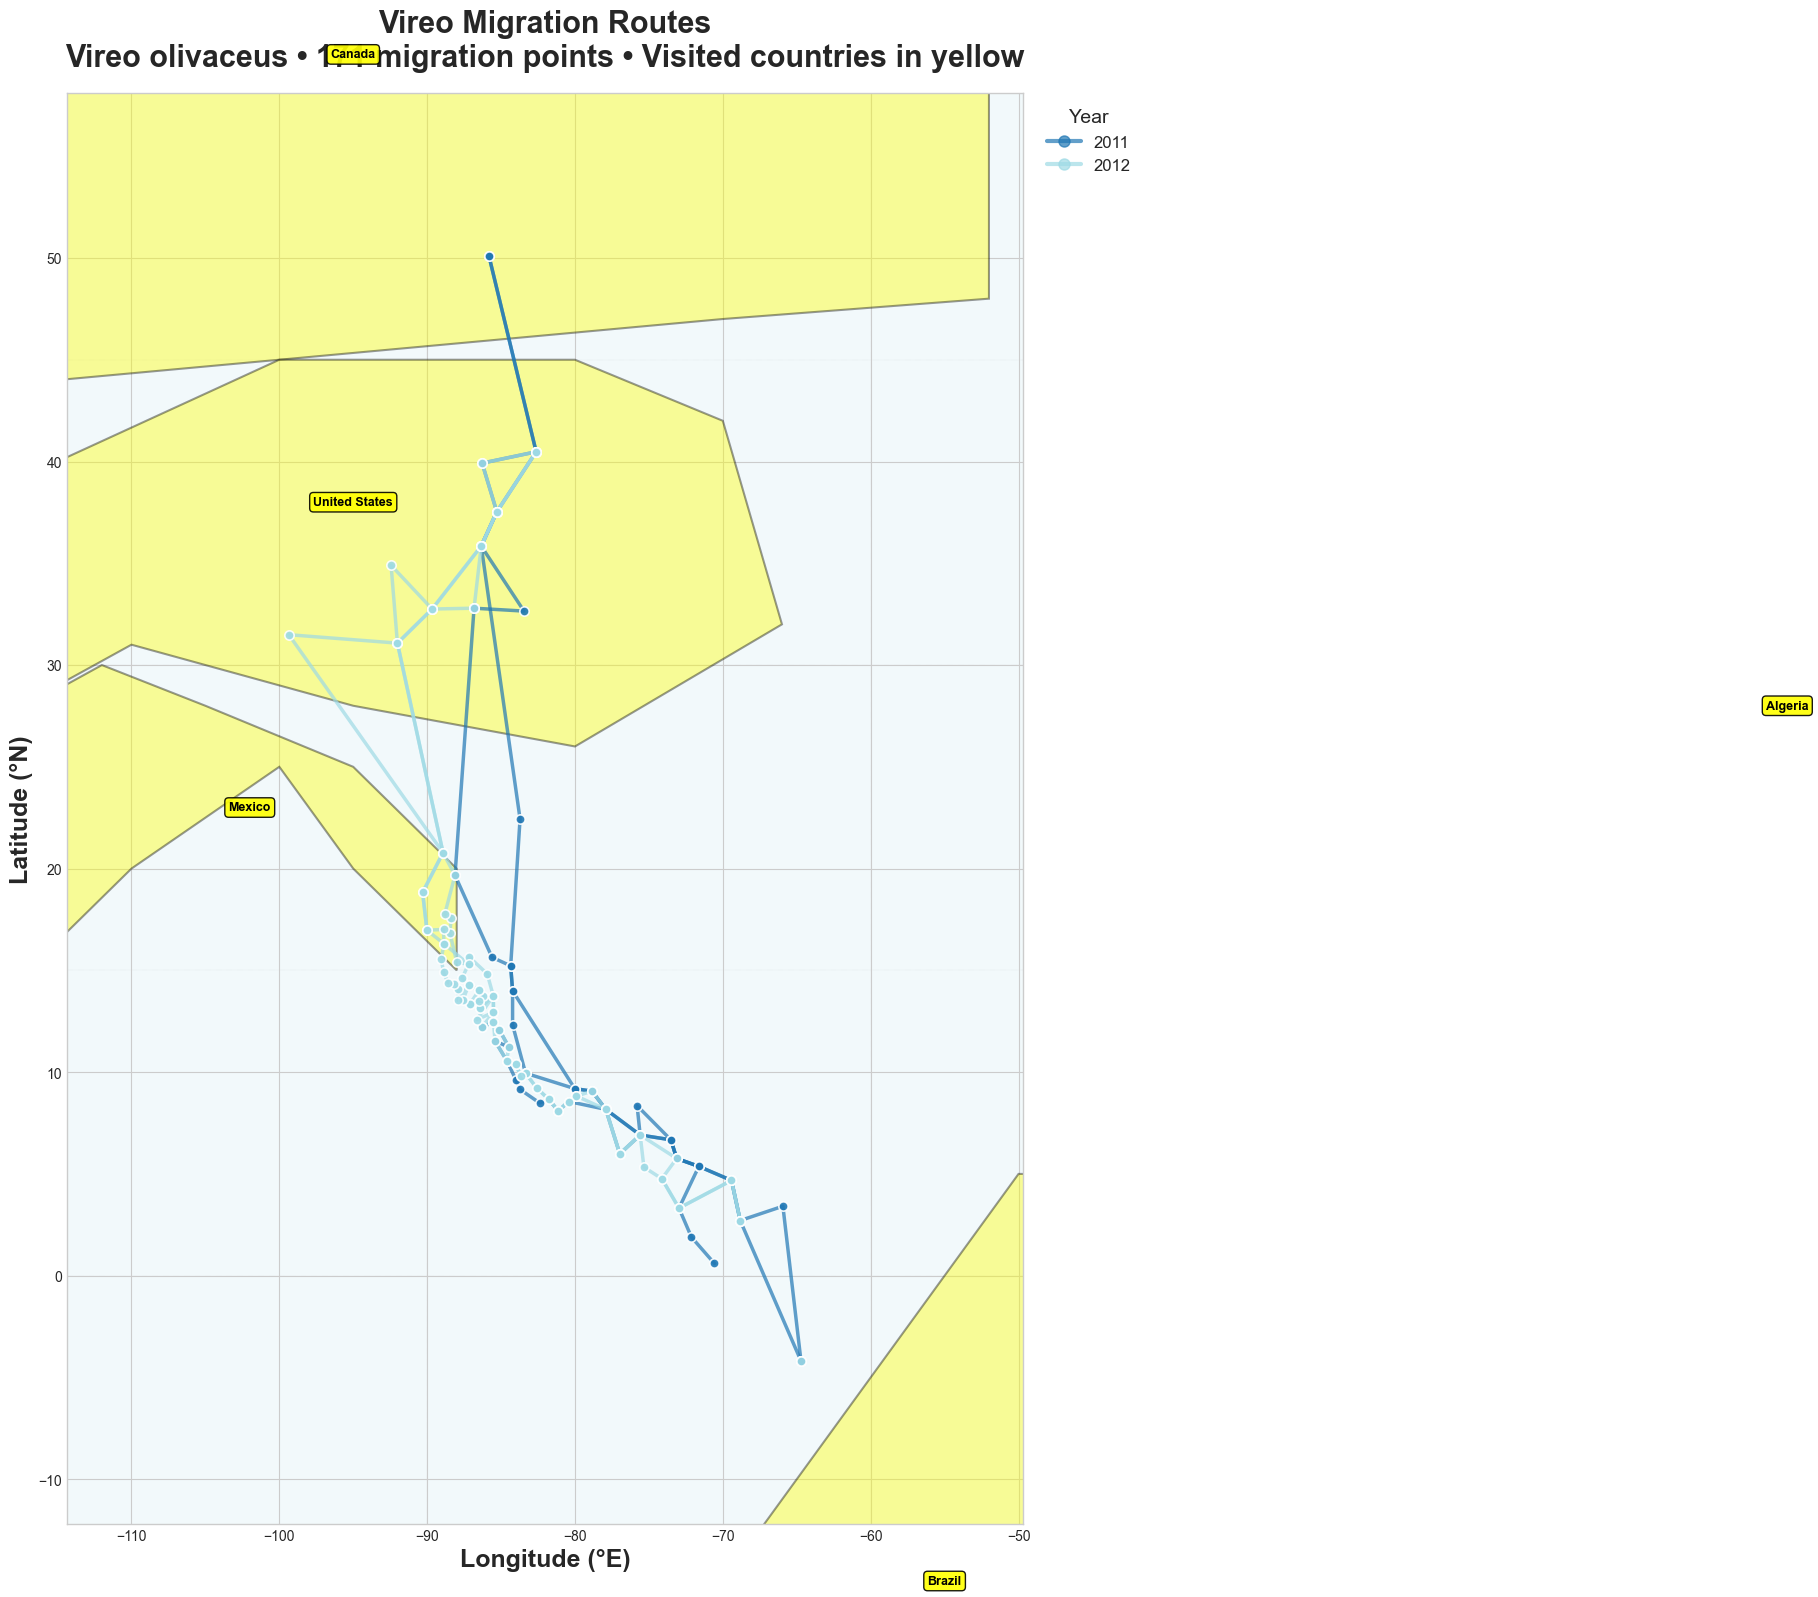

✓ Map created for Vireo


In [24]:
# Create figure with large size for detail
fig, ax = plt.subplots(figsize=(28, 16))

# Draw base world map with visited countries highlighted
draw_world_base_map(ax, visited_countries)

# Dictionary to store legend entries (one per year)
legend_entries = {}

# Draw migration routes for each year
for year in years:
    # Get data for this year
    year_data = genus_clean[genus_clean['Migration start year'] == year].copy()
    
    # Get color for this year
    color = colormap(norm(year))
    
    # Process each migration route separately
    for route_code in year_data['Migratory route codes'].unique():
        # Get all points in this route
        route_data = year_data[year_data['Migratory route codes'] == route_code].sort_values('ID')
        
        # If route has multiple points, draw connecting lines
        if len(route_data) > 1:
            points = route_data[['GPS_xx', 'GPS_yy']].values
            ax.plot(points[:, 0], points[:, 1], 
                   color=color, 
                   linewidth=2.5, 
                   alpha=0.7,  # Semi-transparent for overlapping routes
                   solid_capstyle='round',
                   zorder=4)  # Draw above map but below points
        
        # Draw points for this route
        ax.scatter(route_data['GPS_xx'], route_data['GPS_yy'], 
                  c=[color],  # Use year's color
                  s=45,  # Point size
                  alpha=0.9,  # Nearly opaque
                  edgecolors='white',  # White border for visibility
                  linewidth=1.2,
                  zorder=5)  # Draw on top of everything
        
        # Create legend entry (only once per year)
        if str(int(year)) not in legend_entries:
            legend_entries[str(int(year))] = plt.Line2D(
                [0], [0], 
                color=color, 
                linewidth=3,
                marker='o', 
                markersize=8, 
                alpha=0.7
            )

# Set labels and title
ax.set_xlabel('Longitude (°E)', fontsize=18, fontweight='bold')
ax.set_ylabel('Latitude (°N)', fontsize=18, fontweight='bold')

# Create informative title
species_name = genus_clean['English Name'].unique()[0]
ax.set_title(
    f'{GENUS_NAME} Migration Routes\n{species_name} • {len(genus_clean)} migration points • Visited countries in yellow', 
    fontsize=22, 
    fontweight='bold', 
    pad=20
)

# Add legend
ax.legend(
    legend_entries.values(), 
    legend_entries.keys(),
    title='Year', 
    loc='upper left', 
    bbox_to_anchor=(1.01, 1),
    fontsize=12, 
    title_fontsize=14, 
    framealpha=0.98,
    edgecolor='black', 
    fancybox=True
)

# Set map bounds with margins
margin_lon = 15  # degrees
margin_lat = 8   # degrees
ax.set_xlim(
    genus_clean['GPS_xx'].min() - margin_lon, 
    genus_clean['GPS_xx'].max() + margin_lon
)
ax.set_ylim(
    genus_clean['GPS_yy'].min() - margin_lat, 
    genus_clean['GPS_yy'].max() + margin_lat
)

plt.tight_layout()
plt.show()

print(f"✓ Map created for {GENUS_NAME}")

---
## Step 8: Save the Map

Save the visualization as a high-resolution image.

✓ Saved: vireo_migration_map.png


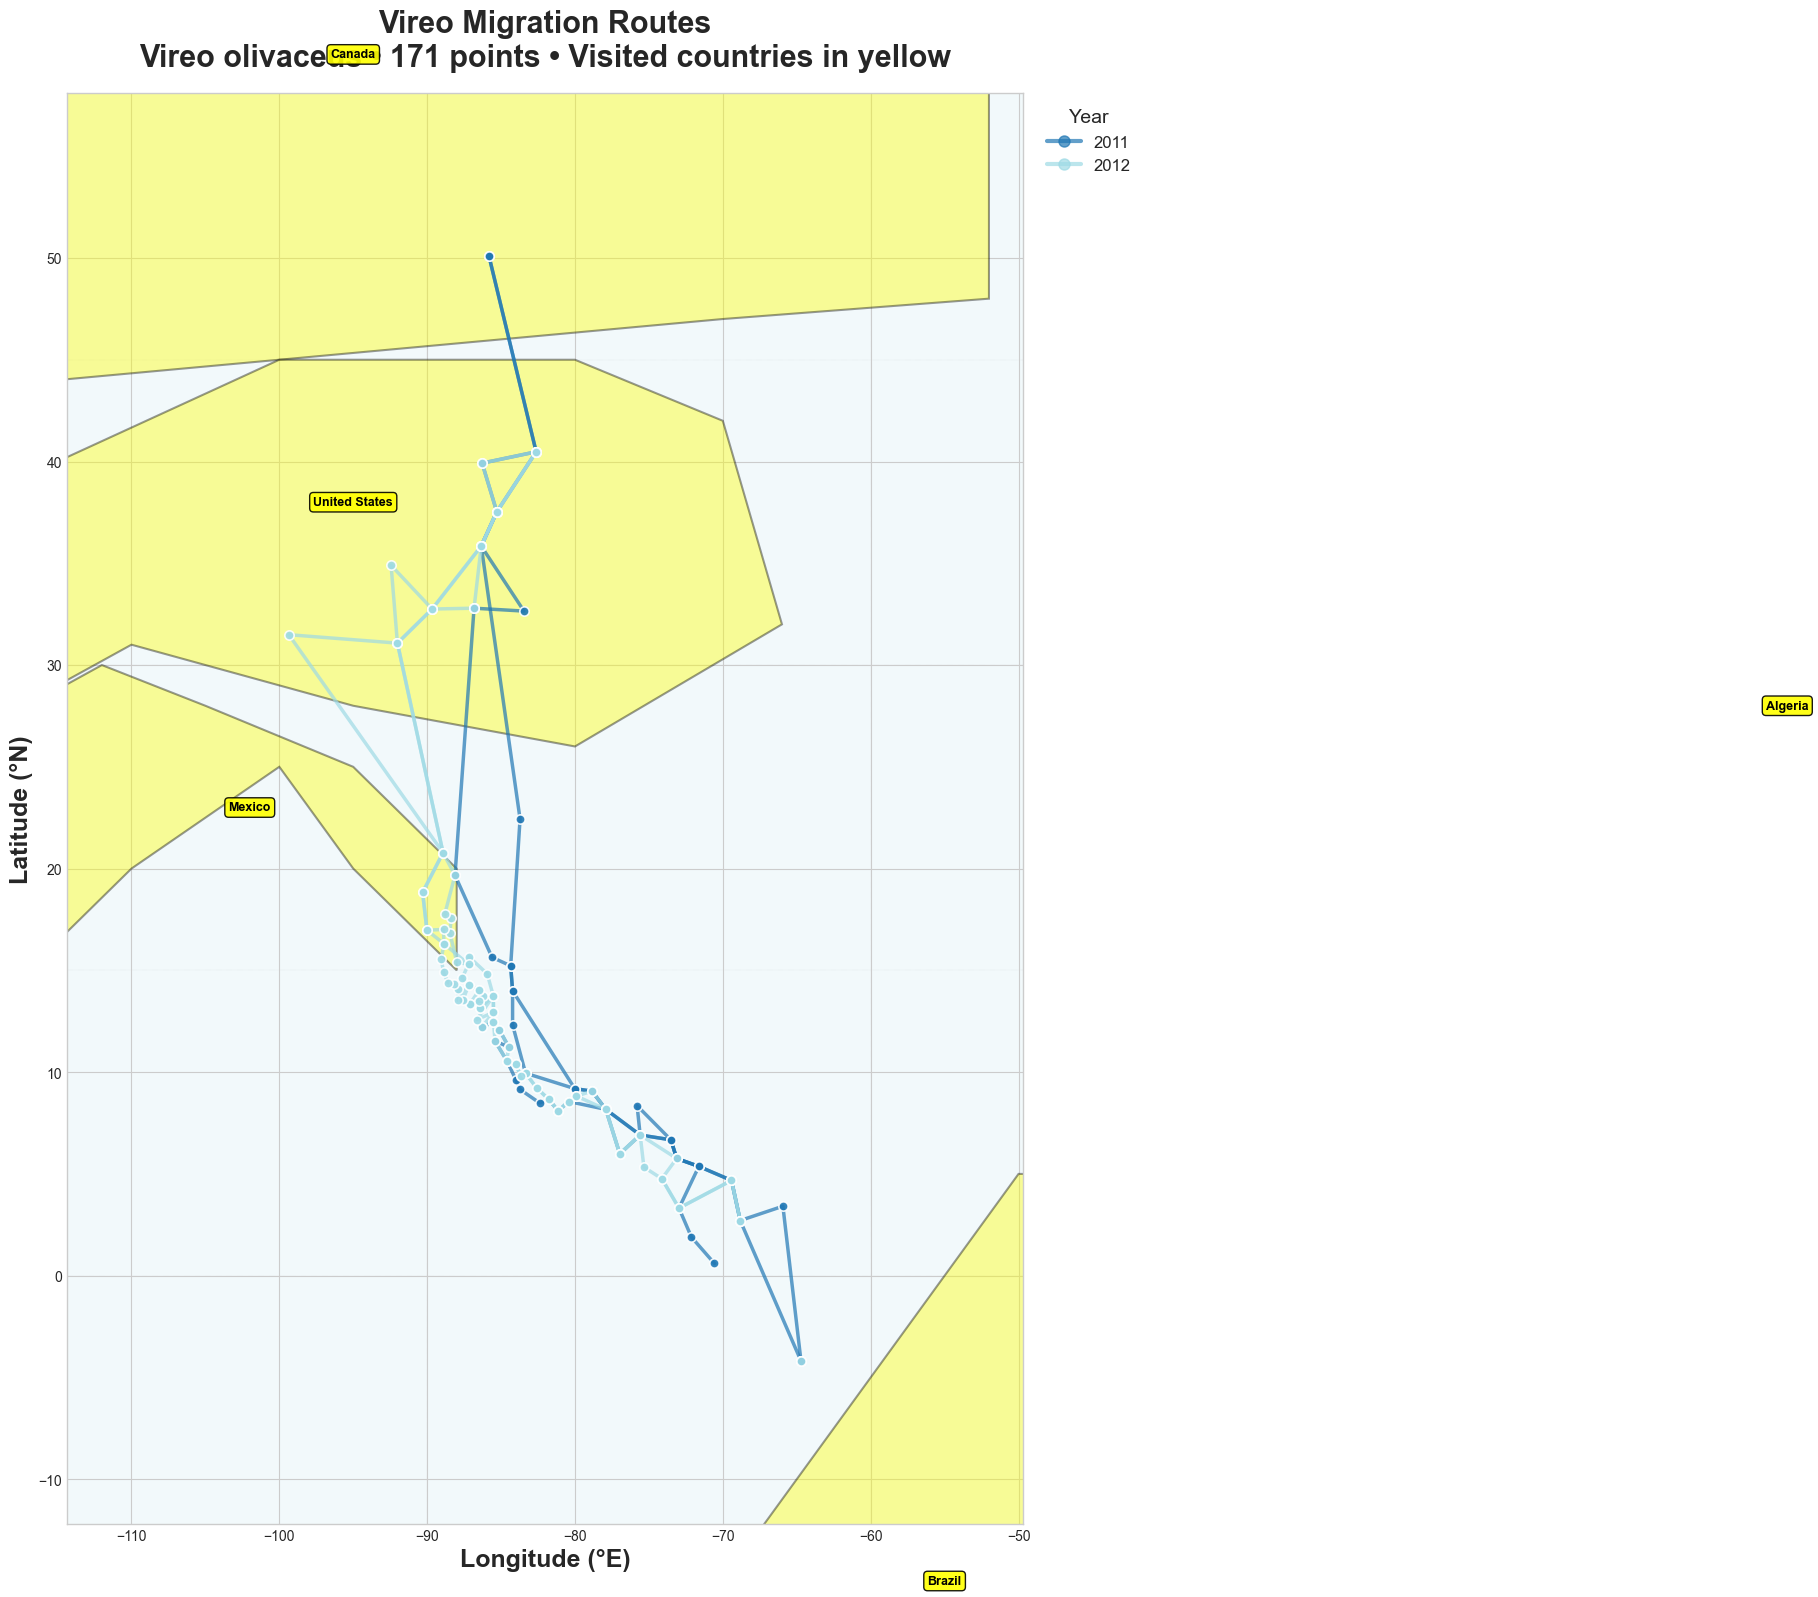

In [25]:
# Recreate the figure to save it
fig, ax = plt.subplots(figsize=(28, 16))

# Draw everything again (same code as above)
draw_world_base_map(ax, visited_countries)
legend_entries = {}

for year in years:
    year_data = genus_clean[genus_clean['Migration start year'] == year].copy()
    color = colormap(norm(year))
    
    for route_code in year_data['Migratory route codes'].unique():
        route_data = year_data[year_data['Migratory route codes'] == route_code].sort_values('ID')
        
        if len(route_data) > 1:
            points = route_data[['GPS_xx', 'GPS_yy']].values
            ax.plot(points[:, 0], points[:, 1], color=color, linewidth=2.5, alpha=0.7, zorder=4)
        
        ax.scatter(route_data['GPS_xx'], route_data['GPS_yy'], c=[color], s=45, 
                  alpha=0.9, edgecolors='white', linewidth=1.2, zorder=5)
        
        if str(int(year)) not in legend_entries:
            legend_entries[str(int(year))] = plt.Line2D([0], [0], color=color, 
                                                        linewidth=3, marker='o', 
                                                        markersize=8, alpha=0.7)

ax.set_xlabel('Longitude (°E)', fontsize=18, fontweight='bold')
ax.set_ylabel('Latitude (°N)', fontsize=18, fontweight='bold')
ax.set_title(f'{GENUS_NAME} Migration Routes\n{species_name} • {len(genus_clean)} points • Visited countries in yellow', 
             fontsize=22, fontweight='bold', pad=20)
ax.legend(legend_entries.values(), legend_entries.keys(), title='Year', 
          loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=12, 
          title_fontsize=14, framealpha=0.98, edgecolor='black', fancybox=True)
ax.set_xlim(genus_clean['GPS_xx'].min() - 15, genus_clean['GPS_xx'].max() + 15)
ax.set_ylim(genus_clean['GPS_yy'].min() - 8, genus_clean['GPS_yy'].max() + 8)

plt.tight_layout()

# Save as high-resolution PNG
output_filename = f'{GENUS_NAME.lower()}_migration_map.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {output_filename}")

plt.show()

---
## Step 9: Batch Process Multiple Genera

Create maps for multiple bird genera automatically.

In [26]:
# List of genera to process
genera_to_process = [
    'Setophaga',      # New World Warbler
    'Phylloscopus',   # Old World Warbler
    'Cuculus',        # Cuckoo
    'Calidris',       # Sandpiper
    'Larus',          # Gull
    # Add more genera as needed
]

print("Creating maps for multiple genera...")
print("=" * 70)

for genus_name in genera_to_process:
    print(f"\nProcessing: {genus_name}")
    
    # Filter and clean data
    genus_data = df[df['Bird genera'] == genus_name].copy()
    genus_clean = genus_data.dropna(subset=['GPS_xx', 'GPS_yy', 'Migration start year'])
    
    if len(genus_clean) == 0:
        print(f"  ⚠ No data found for {genus_name}")
        continue
    
    print(f"  Records: {len(genus_clean)}")
    
    # Sort data
    genus_clean = genus_clean.sort_values(['Migratory route codes', 'Migration start year', 'ID'])
    
    # Setup colors
    years = sorted(genus_clean['Migration start year'].unique())
    colormap = cm.get_cmap('tab20', len(years))
    norm = Normalize(vmin=min(years), vmax=max(years))
    
    # Get visited countries
    visited_countries = set(genus_clean['Countries'].unique())
    
    # Create figure
    fig, ax = plt.subplots(figsize=(28, 16))
    draw_world_base_map(ax, visited_countries)
    
    # Draw routes
    legend_entries = {}
    for year in years:
        year_data = genus_clean[genus_clean['Migration start year'] == year].copy()
        color = colormap(norm(year))
        
        for route_code in year_data['Migratory route codes'].unique():
            route_data = year_data[year_data['Migratory route codes'] == route_code].sort_values('ID')
            
            if len(route_data) > 1:
                points = route_data[['GPS_xx', 'GPS_yy']].values
                ax.plot(points[:, 0], points[:, 1], color=color, linewidth=2.5, alpha=0.7, zorder=4)
            
            ax.scatter(route_data['GPS_xx'], route_data['GPS_yy'], c=[color], s=45, 
                      alpha=0.9, edgecolors='white', linewidth=1.2, zorder=5)
            
            if str(int(year)) not in legend_entries:
                legend_entries[str(int(year))] = plt.Line2D([0], [0], color=color, 
                                                            linewidth=3, marker='o', 
                                                            markersize=8, alpha=0.7)
    
    # Labels and formatting
    ax.set_xlabel('Longitude (°E)', fontsize=18, fontweight='bold')
    ax.set_ylabel('Latitude (°N)', fontsize=18, fontweight='bold')
    species_name = genus_clean['English Name'].unique()[0]
    ax.set_title(f'{genus_name} Migration Routes\n{species_name} • {len(genus_clean)} points', 
                 fontsize=22, fontweight='bold', pad=20)
    ax.legend(legend_entries.values(), legend_entries.keys(), title='Year', 
              loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=12, 
              title_fontsize=14, framealpha=0.98)
    ax.set_xlim(genus_clean['GPS_xx'].min() - 15, genus_clean['GPS_xx'].max() + 15)
    ax.set_ylim(genus_clean['GPS_yy'].min() - 8, genus_clean['GPS_yy'].max() + 8)
    
    plt.tight_layout()
    
    # Save
    output_filename = f'{genus_name.lower()}_migration_map.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"  ✓ Saved: {output_filename}")

print("\n" + "=" * 70)
print("✓ All maps created successfully!")

Creating maps for multiple genera...

Processing: Setophaga
  ⚠ No data found for Setophaga

Processing: Phylloscopus
  ⚠ No data found for Phylloscopus

Processing: Cuculus
  ⚠ No data found for Cuculus

Processing: Calidris
  ⚠ No data found for Calidris

Processing: Larus
  ⚠ No data found for Larus

✓ All maps created successfully!


---
## Step 10: Generate Summary Statistics

Analyze migration patterns across genera.

In [27]:
def analyze_genus(df, genus_name):
    """Generate summary statistics for a genus"""
    genus_data = df[df['Bird genera'] == genus_name].copy()
    genus_clean = genus_data.dropna(subset=['GPS_xx', 'GPS_yy', 'Migration start year'])
    
    if len(genus_clean) == 0:
        return None
    
    stats = {
        'Genus': genus_name,
        'Total Points': len(genus_clean),
        'Species Count': genus_clean['English Name'].nunique(),
        'Countries': genus_clean['Countries'].nunique(),
        'Years': f"{int(genus_clean['Migration start year'].min())}-{int(genus_clean['Migration start year'].max())}",
        'Lon Range': f"{genus_clean['GPS_xx'].min():.1f} to {genus_clean['GPS_xx'].max():.1f}",
        'Lat Range': f"{genus_clean['GPS_yy'].min():.1f} to {genus_clean['GPS_yy'].max():.1f}",
        'Top Country': genus_clean['Countries'].value_counts().index[0],
    }
    
    return stats

# Analyze all genera
all_stats = []
for genus in genera_to_process:
    stats = analyze_genus(df, genus)
    if stats:
        all_stats.append(stats)

# Create summary dataframe
summary_df = pd.DataFrame(all_stats)
print("\nMigration Summary Statistics:")
print("=" * 100)
summary_df


Migration Summary Statistics:


""


---
## Additional Tips and Customization

### Improving Country Borders
For production maps, consider using:
```python
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
```

### Customizing Colors
Try different colormaps:
- `'viridis'` - perceptually uniform
- `'tab10'`, `'tab20'` - categorical
- `'rainbow'` - full spectrum

### Adding More Features
- Add elevation data for terrain
- Include migration corridors as shaded regions
- Show species density heatmaps
- Add temporal animations by year

### Performance Optimization
- Use `rasterio` for large datasets
- Simplify country polygons with `shapely`
- Cache base map for multiple genera

---

## Conclusion

You now have a complete workflow for visualizing bird migration routes with:
- ✅ Professional-looking maps
- ✅ Country borders and labels
- ✅ Year-based color coding
- ✅ Connected migration routes
- ✅ Batch processing capabilities

This approach is ideal for:
- Research publications
- Conservation planning
- Educational materials
- Light pollution impact studies